# Albert Einstein
## Francisco Venicius F da Silva

### Importing Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


### Readind Data

In [2]:
dfPoints = pd.read_csv("df_points.txt", delimiter="\t")
dfPoints.drop(['Unnamed: 0'], axis=1, inplace= True)
dfPoints.head()

,x,y,z,label
0,326.488285,188.988808,-312.205307,0.0
1,-314.287214,307.276723,-179.037412,1.0
2,-328.208910,181.627758,446.311062,1.0
3,-148.658890,147.027947,-27.477959,1.0
4,-467.065931,250.467651,-306.475330,1.0


% de 1.0:  50.27
% de 0.0:  49.73


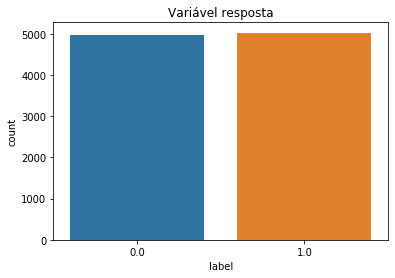

In [3]:

n=len(dfPoints)
surv_0=len(dfPoints[dfPoints['label']==0.0])
surv_1=len(dfPoints[dfPoints['label']==1.0])

print("% de 1.0: ",surv_1*100/n)
print("% de 0.0: ",surv_0*100/n)

fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='label', data=dfPoints)
plt.title("Variável resposta")
plt.show()

In [4]:
num=['x', 'y', 'z']
corr_df=dfPoints[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

          x         y         z
x  1.000000 -0.007873  0.000331
y -0.007873  1.000000  0.007636
z  0.000331  0.007636  1.000000


In [5]:
#csq=chi2_contingency(pd.crosstab(dfPoints['label'], dfPoints['x']))
#print("P-value(x): ",csq[1])
#
#csq=chi2_contingency(pd.crosstab(dfPoints['label'], dfPoints['y']))
#print("P-value(y): ",csq[1])
#
#csq=chi2_contingency(pd.crosstab(dfPoints['label'], dfPoints['z']))
#print("P-value (z): ",csq[1])

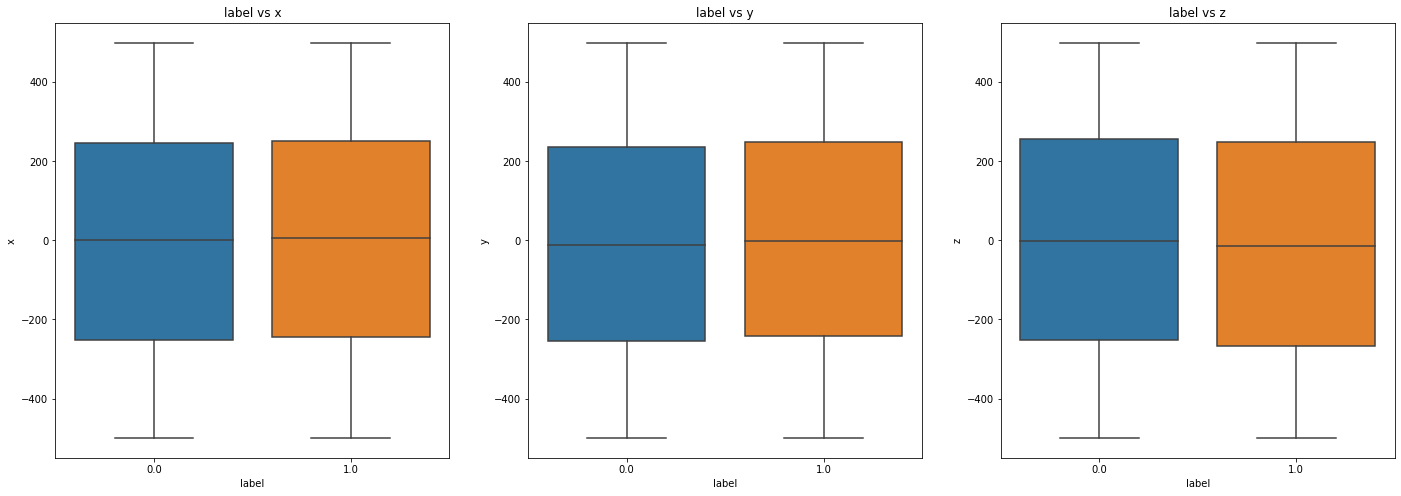

In [6]:
fig, ax=plt.subplots(1,3,figsize=(24,8), sharex=True)
sns.boxplot(x='label',y='x', data=dfPoints, ax=ax[0])
ax[0].set_title("label vs x")
sns.boxplot(x='label',y='y', data=dfPoints, ax=ax[1])
ax[1].set_title("label vs y")
sns.boxplot(x='label',y='z', data=dfPoints, ax=ax[2])
ax[2].set_title("label vs z")
plt.show()

In [7]:
y = dfPoints['label'].apply(lambda x: 0 if x==0.0 else 1)
X = dfPoints.drop(['label'], axis=1)

## Using Random Forest and Logistic Regresion (StandardScaler data)


In [11]:
names = X.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [13]:
logit = LogisticRegression()
param_grid = {'C':np.logspace(-3,3,7), 'penalty':['l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [14]:

CV_logit = GridSearchCV(estimator = logit, param_grid = param_grid, cv=5)
CV_logit.fit(x_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [15]:
print('best_params_',CV_logit.best_params_)
pred = CV_logit.predict(x_test)
print("Accuracy for LogisticRegression on CV data: ",accuracy_score(y_test,pred))

best_params_ {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for LogisticRegression on CV data:  0.5693333333333334


### Random Forest

In [16]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [2, 5, 8, 10, 13, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

In [17]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)#, verbose=2)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [18]:
print('best_params_',CV_rfc.best_params_)
pred = CV_rfc.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

best_params_ {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 15}
Accuracy for Random Forest on CV data:  0.716


Random F.: ROC AUC=0.774973
Logistic: ROC AUC=0.537140


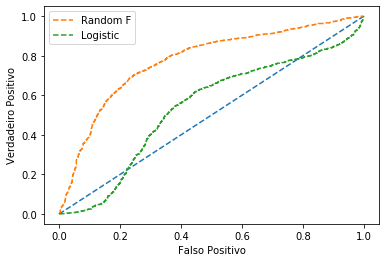

In [19]:
ns_probs = [0 for _ in range(len(y_test))]


rf_probs = CV_rfc.predict_proba(x_test)
rf_probs = rf_probs[:, 1]

lr_probs = CV_logit.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('Random F.: ROC AUC=%.6f' % (rf_auc))
print('Logistic: ROC AUC=%.6f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(rf_fpr, rf_tpr, linestyle='--', label='Random F')
pyplot.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic')

pyplot.xlabel('Falso Positivo')
pyplot.ylabel('Verdadeiro Positivo')

pyplot.legend()

pyplot.show()
